In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl

Text(0.5, 1.0, '$\\pi(x_i | x_j)$')

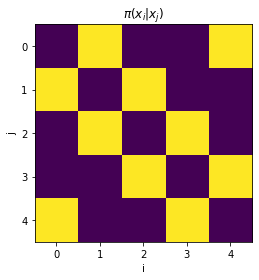

In [2]:
# T[i, j] = P(x_i | x_j)
T = np.array([[0.0, 0.5, 0.0, 0.0, 0.5],
              [0.5, 0.0, 0.5, 0.0, 0.0],
              [0.0, 0.5, 0.0, 0.5, 0.0],
              [0.0, 0.0, 0.5, 0.0, 0.5],
              [0.5, 0.0, 0.0, 0.5, 0.0]])
plt.imshow(T); plt.xlabel("i"); plt.ylabel("j"); plt.title("$\pi(x_i | x_j)$")

In [3]:
# Sample from the Markov Chain
init = [0.0, 0.0, 1.0, 0.0, 0.0]
samples = np.array([init] * 1000).T

## Evolution of one sample

In [4]:
samples = np.array([init] * 1).T  # initialise with one sample
samples_hist = [samples[:, 0]]
for _ in range(40):
    samples = (np.eye(5)[np.hstack([np.random.choice(5, 1, p=r) for r in (T @ samples).T])]).T
    samples_hist.append(samples[:, 0])

Text(0.5, 1.0, 'Markov Chain $X_t$ over time')

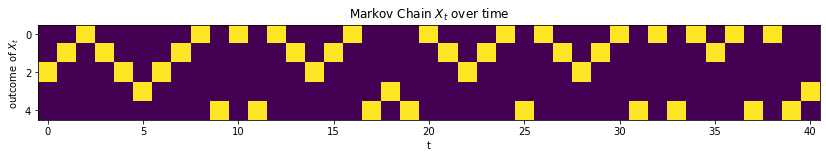

In [5]:
plt.figure(figsize=(14, 2))
plt.imshow(np.vstack(samples_hist).T)
plt.xlabel("t")
plt.ylabel("outcome of $X_t$")
plt.title("Markov Chain $X_t$ over time")

## Evolution of many samples

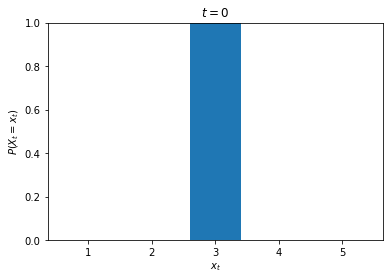

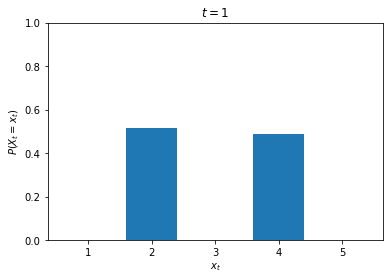

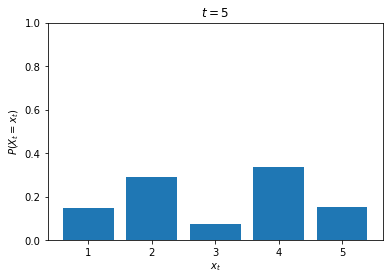

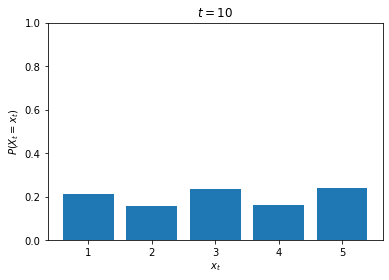

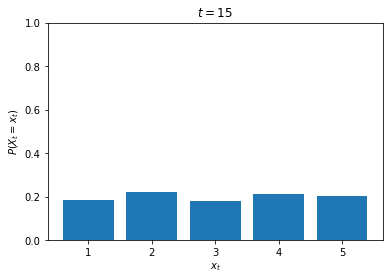

In [6]:
samples = np.array([init] * 1000).T  # initialise with one sample
for i in range(20):
    if i % 5 == 0 or i == 1:
        plt.figure()
        plt.bar(np.arange(1, 6), np.mean(samples, 1))
        plt.title(f"$t = {i}$")
        plt.xlabel("$x_t$")
        plt.ylabel("$P(X_t = x_t)$")
        plt.ylim(0, 1)
    samples = (np.eye(5)[np.hstack([np.random.choice(5, 1, p=r) for r in (T @ samples).T])]).T

## Evolution of probability distribution

(0.0, 1.0)

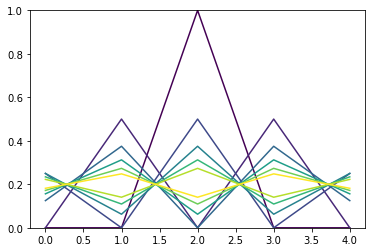

In [7]:
p = np.array(init)
n = 10
colors = pl.cm.viridis(np.linspace(0,1,n))
for i in range(n):
    plt.plot(p, color=colors[i])
    p = T @ p
plt.ylim(0, 1)